# **Project Name -**

# Project Regarding EDA (Exploratory Data Analysis) and Clustering Methodology RFM (Recency, Frequency and Monetary) for Online-Retail Global E-commerce Dataset

# **Project Summary -**

Answer:  This project focuses on analyzing an Online Retail transactional dataset to understand customer purchasing behavior and segment customers into meaningful groups using Exploratory Data Analysis (EDA) and clustering techniques. The dataset contains transaction-level information including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.

#### Exploratory Data Analysis (EDA):

EDA was performed to gain insights into sales patterns, customer behavior, and data quality. Key steps included:

Data cleaning by handling missing CustomerID, removing cancelled transactions, and filtering negative quantities and prices

Analysis of sales trends over time using InvoiceDate

Identification of top-selling products and high-revenue customers

Country-wise sales and customer distribution analysis

Feature engineering to derive meaningful customer-level metrics

#### Feature Engineering:

To enable customer segmentation, RFM (Recency, Frequency, Monetary) features were created:

Recency: Days since the customer’s last purchase

Frequency: Number of transactions per customer

Monetary: Total revenue generated by each customer

These features were standardized to ensure fair contribution during clustering.

#### Clustering Methodology:

Applied K-Means clustering to segment customers based on RFM values

Used the Elbow Method and Silhouette Score to determine the optimal number of clusters

Interpreted clusters to identify distinct customer groups such as:

High-value loyal customers

Frequent but low-spending customers

Inactive or at-risk customers

New or occasional buyers


# **GitHub Link -**

In [ ]:
https://github.com/PODDA2N/Internship-of-Shopper-Spectrum_Online-Retail-AI-ML

# **Problem Statement**

Answer: The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# ***Let's Begin !***

# **1. Know Your Data**

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset Loading

#### Dataset First View

In [2]:
data = pd.read_csv("E:\Data Analyst Coding\Machine Learning Project Internship\online_retail.csv")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


#### Dataset Rows & Columns count

In [3]:
rows, columns = data.shape
rows, columns

(541909, 8)

#### Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [6]:
duplicate_values = data.duplicated(subset = ['CustomerID','Country','Description','Quantity','UnitPrice','InvoiceNo']).sum()
duplicate_values

np.int64(5339)

#### Missing Values/Null Values

In [7]:
data.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [8]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### What did you know about your dataset?

Answer: 

#### 2. Understanding Your Variables

In [9]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Variables Description

Answer: InvoiceNo: Transaction number

StockCode: Unique product/item code

Description: Name of the product

Quantity: Number of products purchased

InvoiceDate: Date and time of transaction (2022–2023)

UnitPrice: Price per product

CustomerID: Unique identifier for each customer

Country: Country where the customer is based

#### Check Unique Values for each variable.

In [11]:
data['Description'].nunique()

4223

In [12]:
data['CustomerID'].nunique()

4372

In [13]:
data['Country'].nunique()

38

In [14]:
data['UnitPrice'].nunique()

1630

In [15]:
data['Quantity'].nunique()

722

# ***3. Data Wrangling***

#### Data Wrangling Code

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])    # Convert Date Column
data['InvoiceDate']

0        2022-12-01 08:26:00
1        2022-12-01 08:26:00
2        2022-12-01 08:26:00
3        2022-12-01 08:26:00
4        2022-12-01 08:26:00
                 ...        
541904   2023-12-09 12:50:00
541905   2023-12-09 12:50:00
541906   2023-12-09 12:50:00
541907   2023-12-09 12:50:00
541908   2023-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [22]:
data.loc[:,'Year'] = data['InvoiceDate'].dt.year
data.loc[:,'Year']

0         2022
1         2022
2         2022
3         2022
4         2022
          ... 
541904    2023
541905    2023
541906    2023
541907    2023
541908    2023
Name: Year, Length: 406829, dtype: int32

In [30]:
data.loc[:,'Month'] = data['InvoiceDate'].dt.month
data.loc[:,'Day'] = data['InvoiceDate'].dt.day
data.loc[:,'Hour'] = data['InvoiceDate'].dt.hour
data.loc[:,'Weekday'] = data['InvoiceDate'].dt.day_name()


In [17]:
data = data.dropna(subset=['CustomerID'])    # Remove missing CustomerID
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2023-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2023-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2023-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2023-12-09 12:50:00,4.15,12680.0,France


In [19]:
data.loc[:,'TotalAmount'] = data['Quantity'] * data['UnitPrice']
data.loc[:,'TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 406829, dtype: float64

#### What all manipulations have you done and insights you found?

Answer: 

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

#### Univariate Analysis (Distribution Analysis)

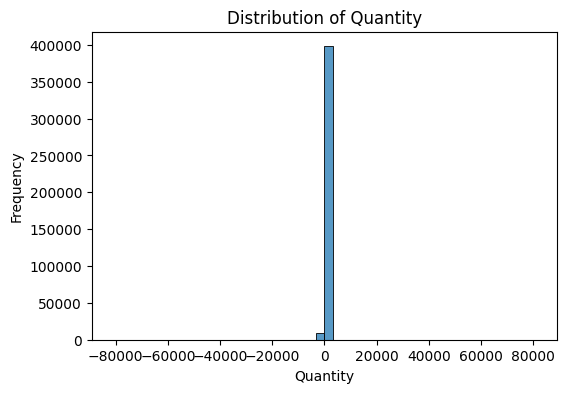

In [25]:
plt.figure(figsize = (6,4))                             # Quantity Distribution
sns.histplot(x = data['Quantity'], bins = 50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.show()

#### Total Amount Distribution (Skewness)

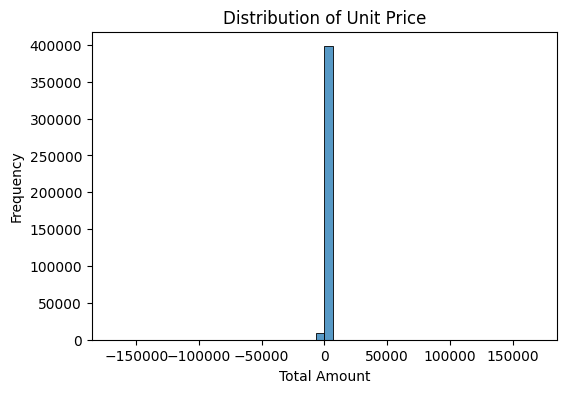

In [27]:
plt.figure(figsize=(6,4))                              # Total Amount Distribution (Skewness)
sns.histplot(x = data['TotalAmount'], bins = 50)
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Price')
plt.show()

#### Monthly Sales Trend

In [31]:
monthly_sales = data.groupby(['Year', 'Month'])['TotalAmount'].sum().reset_index()
monthly_sales

,Year,Month,TotalAmount
0,2022,12,554604.020
1,2023,1,475074.380
2,2023,2,436546.150
3,2023,3,579964.610
4,2023,4,426047.851
5,2023,5,648251.080
6,2023,6,608013.160
7,2023,7,574238.481
8,2023,8,616368.000
9,2023,9,931440.372


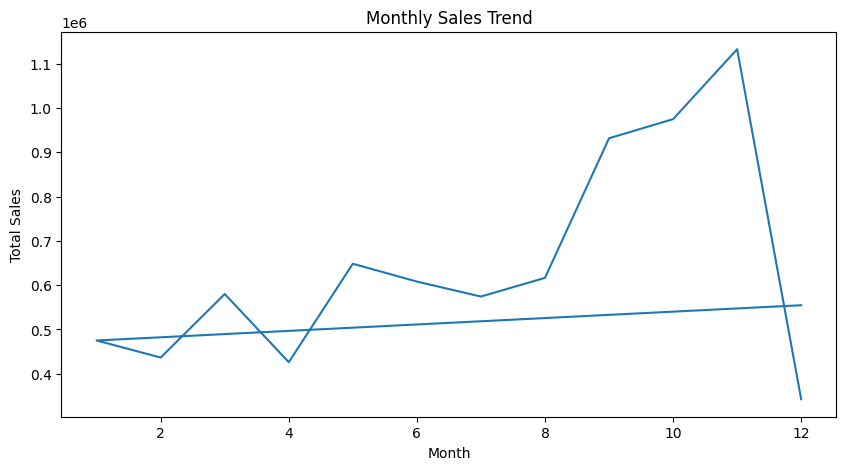

In [32]:
plt.figure(figsize = (10,5))
plt.plot(monthly_sales['Month'], monthly_sales['TotalAmount'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()

#### Sales by Weekday

In [33]:
weekday_sales = data.groupby('Weekday')['TotalAmount'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
weekday_sales

Weekday
Monday        784418.851
Tuesday      1274551.511
Wednesday    1563193.591
Thursday     1530477.490
Friday       1906108.190
Saturday     1241316.181
Sunday               NaN
Name: TotalAmount, dtype: float64

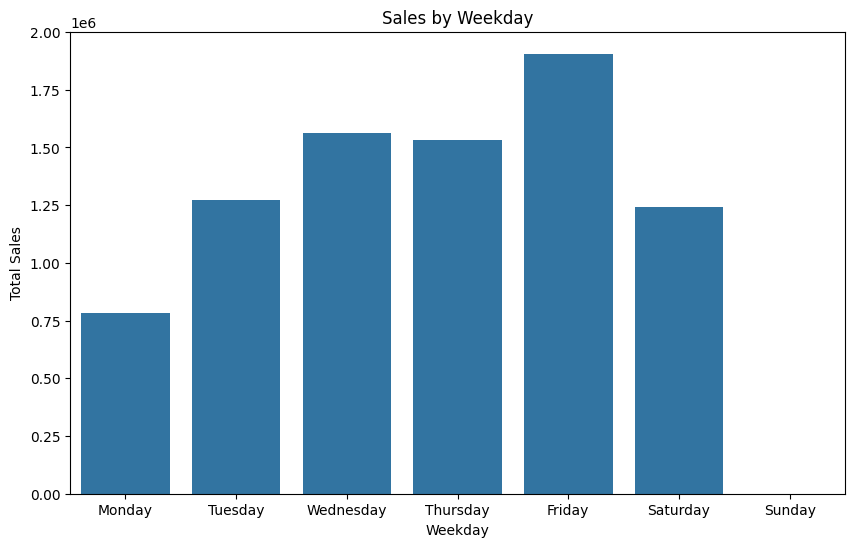

In [41]:
plt.figure(figsize = (10,6))
sns.barplot(data = weekday_sales)
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.title('Sales by Weekday')
plt.show()

#### Country-Level Analysis
#### Top 10 Countries by Sales

In [42]:
top_countries = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False).head(10)
top_countries

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalAmount, dtype: float64

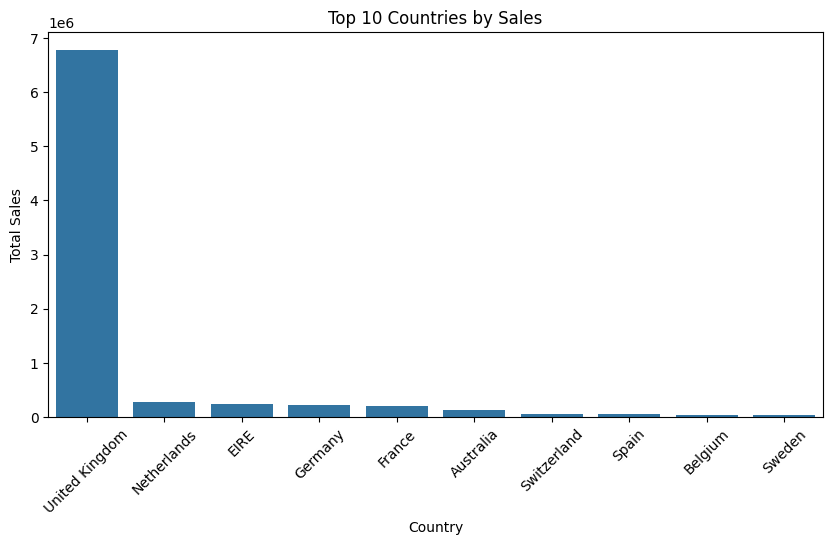

In [54]:
plt.figure(figsize = (10,5))
sns.barplot(data = top_countries)
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.title('Top 10 Countries by Sales')
plt.show()

#### Top 10 Countries by Number of Transactions

In [44]:
country_orders = data.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).head(10)
country_orders

Country
United Kingdom    19857
Germany             603
France              458
EIRE                319
Belgium             119
Spain               105
Netherlands         101
Switzerland          71
Portugal             70
Australia            69
Name: InvoiceNo, dtype: int64

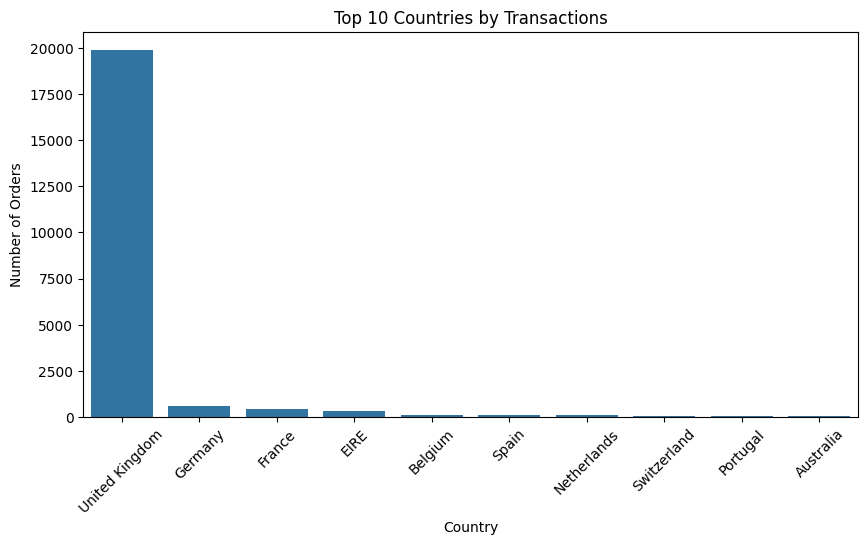

In [53]:
plt.figure(figsize = (10,5))
sns.barplot(data = country_orders)
plt.xlabel('Country')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 45)
plt.title('Top 10 Countries by Transactions')
plt.show()

#### Top 10 Products by Sales

In [46]:
top_products = data.groupby('Description')['TotalAmount'].sum().sort_values(ascending = False).head(10)
top_products

Description
REGENCY CAKESTAND 3 TIER              132870.40
WHITE HANGING HEART T-LIGHT HOLDER     93823.85
JUMBO BAG RED RETROSPOT                83236.76
PARTY BUNTING                          67687.53
POSTAGE                                66710.24
ASSORTED COLOUR BIRD ORNAMENT          56499.22
RABBIT NIGHT LIGHT                     51137.80
CHILLI LIGHTS                          45936.81
PAPER CHAIN KIT 50'S CHRISTMAS         41500.48
PICNIC BASKET WICKER 60 PIECES         39619.50
Name: TotalAmount, dtype: float64

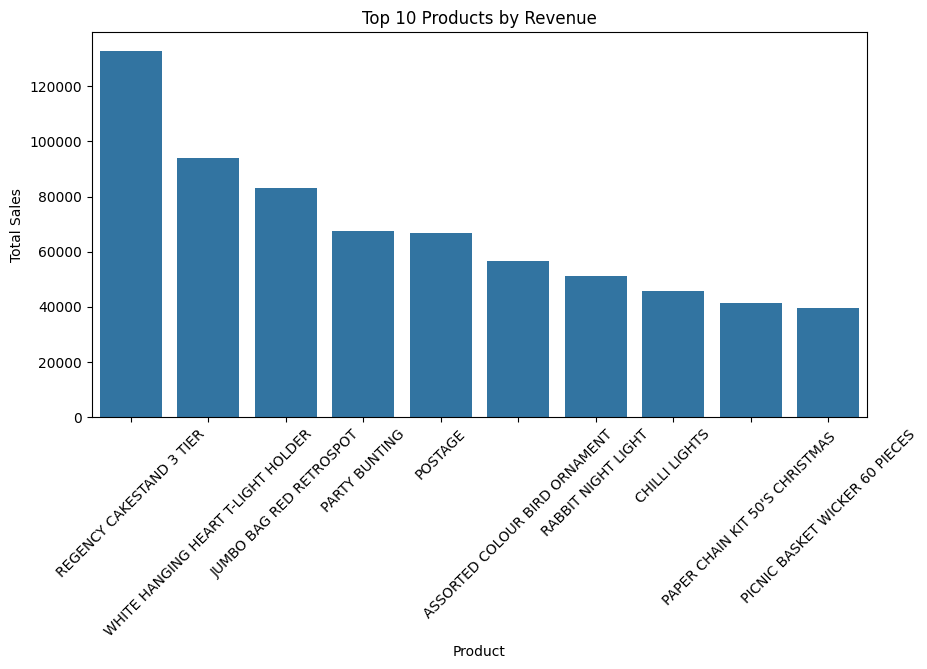

In [52]:
plt.figure(figsize = (10,5))
sns.barplot(data = top_products)
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45)
plt.title('Top 10 Products by Revenue')
plt.show()

#### Heatmap Correlation Analysis

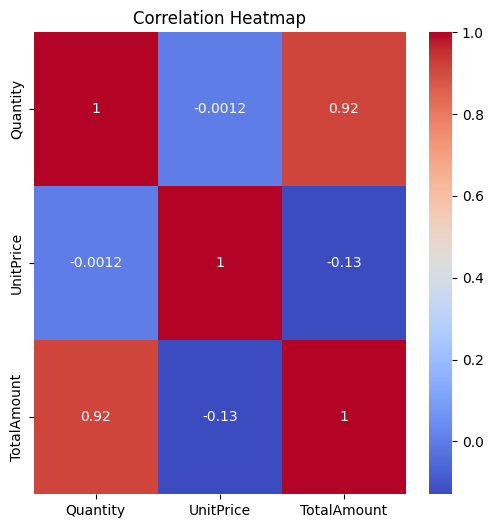

In [51]:
plt.figure(figsize=(6,6))
sns.heatmap(data[['Quantity','UnitPrice','TotalAmount']].corr(),annot = True,cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Pair Plot Represents relationships, distributions, and outliers

In [55]:
pairplot_data = data[['Quantity', 'UnitPrice', 'TotalAmount']]
pairplot_data

,Quantity,UnitPrice,TotalAmount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
...,...,...,...
541904,12,0.85,10.20
541905,6,2.10,12.60
541906,4,4.15,16.60
541907,4,4.15,16.60


In [56]:
pairplot_data = pairplot_data.sample(5000, random_state=42)
pairplot_data

,Quantity,UnitPrice,TotalAmount
47912,2,7.95,15.90
342630,4,3.95,15.80
288183,-4,0.85,-3.40
325368,4,1.65,6.60
331450,24,0.55,13.20
...,...,...,...
472363,2,2.95,5.90
150282,12,5.95,71.40
362600,20,0.85,17.00
66120,1,4.25,4.25


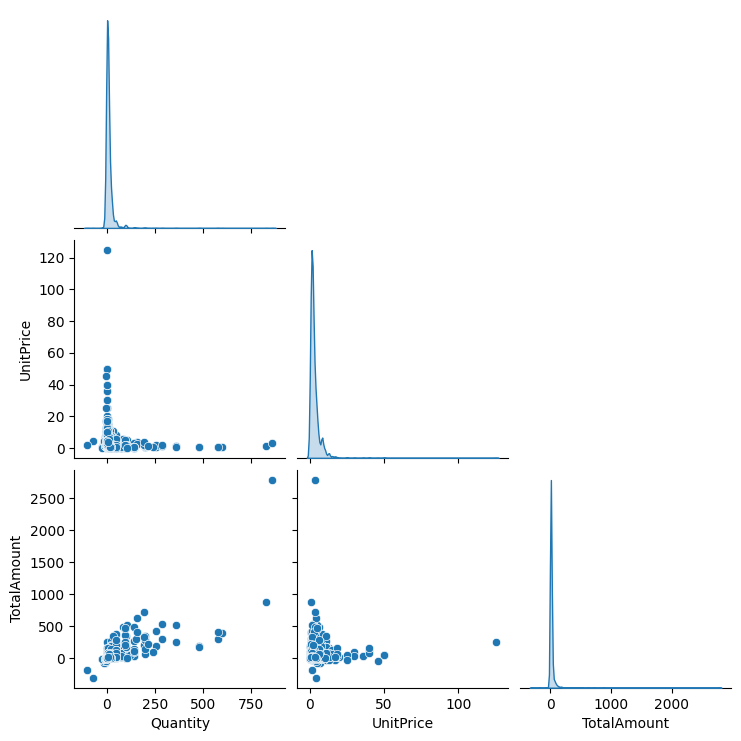

In [58]:
sns.pairplot(pairplot_data, diag_kind = 'kde', corner = True)
plt.show()

#### Pie Plot – Proportion of Sales by Country (Top 4)

In [70]:
country_sales = data.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False).head(4)
country_sales

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
Name: TotalAmount, dtype: float64

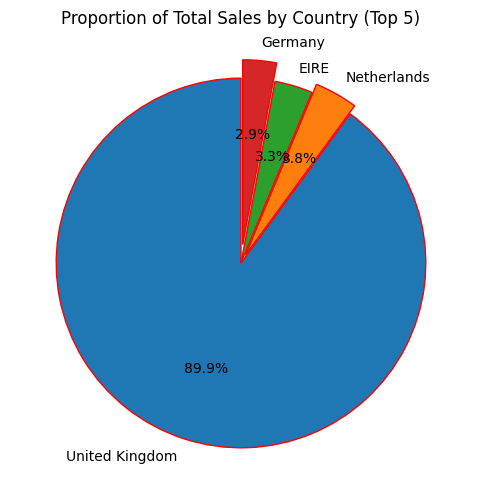

In [71]:
plt.figure(figsize = (6,6))
plt.pie(country_sales, labels = country_sales.index, autopct='%1.1f%%', startangle = 90, wedgeprops = {"edgecolor" : "Red"}, explode = (0,0.05,0,0.1))
plt.title('Proportion of Total Sales by Country (Top 5)')
plt.show()

# Clustering Methodology

#### Calculate Recency = Latest purchase date in dataset − Customer’s last purchase date

In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

0        2022-12-01 08:26:00
1        2022-12-01 08:26:00
2        2022-12-01 08:26:00
3        2022-12-01 08:26:00
4        2022-12-01 08:26:00
                 ...        
541904   2023-12-09 12:50:00
541905   2023-12-09 12:50:00
541906   2023-12-09 12:50:00
541907   2023-12-09 12:50:00
541908   2023-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [4]:
latest_date = data['InvoiceDate'].max()
latest_date

Timestamp('2023-12-09 12:50:00')

In [5]:
customer_last_purchase = data.groupby('CustomerID')['InvoiceDate'].max().reset_index()
customer_last_purchase

,CustomerID,InvoiceDate
0,12346.0,2023-01-18 10:17:00
1,12347.0,2023-12-07 15:52:00
2,12348.0,2023-09-25 13:13:00
3,12349.0,2023-11-21 09:51:00
4,12350.0,2023-02-02 16:01:00
...,...,...
4367,18280.0,2023-03-07 09:52:00
4368,18281.0,2023-06-12 10:53:00
4369,18282.0,2023-12-02 11:43:00
4370,18283.0,2023-12-06 12:02:00


In [6]:
customer_last_purchase.columns = ['CustomerID', 'LastPurchaseDate']
customer_last_purchase.columns

Index(['CustomerID', 'LastPurchaseDate'], dtype='object')

In [7]:
customer_last_purchase['Recency'] = (latest_date - customer_last_purchase['LastPurchaseDate']).dt.days  # Calculate Recency
customer_last_purchase['Recency']

0       325
1         1
2        74
3        18
4       309
       ... 
4367    277
4368    180
4369      7
4370      3
4371     42
Name: Recency, Length: 4372, dtype: int64

#### Choose Clustering Algorithm K-means

In [15]:
rfm_recency = customer_last_purchase[['CustomerID', 'Recency']]      # Prepare for Clustering (Recency Feature)
rfm_recency

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [16]:
from sklearn.preprocessing import StandardScaler               # Scaling before clustering
scaler = StandardScaler()
rfm_recency_scaled = scaler.fit_transform(rfm_recency[['Recency']])
rfm_recency_scaled

array([[ 2.32202285],
       [-0.89373323],
       [-0.1691956 ],
       ...,
       [-0.83418219],
       [-0.87388289],
       [-0.48680114]], shape=(4372, 1))

In [12]:
from sklearn.cluster import KMeans                                 # Apply Clustering (Example: K-Means)
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_recency['RecencyCluster'] = kmeans.fit_predict(rfm_recency_scaled)
rfm_recency['RecencyCluster']

0       1
1       0
2       0
3       0
4       1
       ..
4367    1
4368    2
4369    0
4370    0
4371    0
Name: RecencyCluster, Length: 4372, dtype: int32

In [13]:
rfm_recency.groupby('RecencyCluster')['Recency'].mean().sort_values()   # Interpretation of Clusters

RecencyCluster
0     30.039357
2    151.533088
1    294.372240
Name: Recency, dtype: float64

#### Choose Clustering Algorithm (Hierarchial, DBScan)

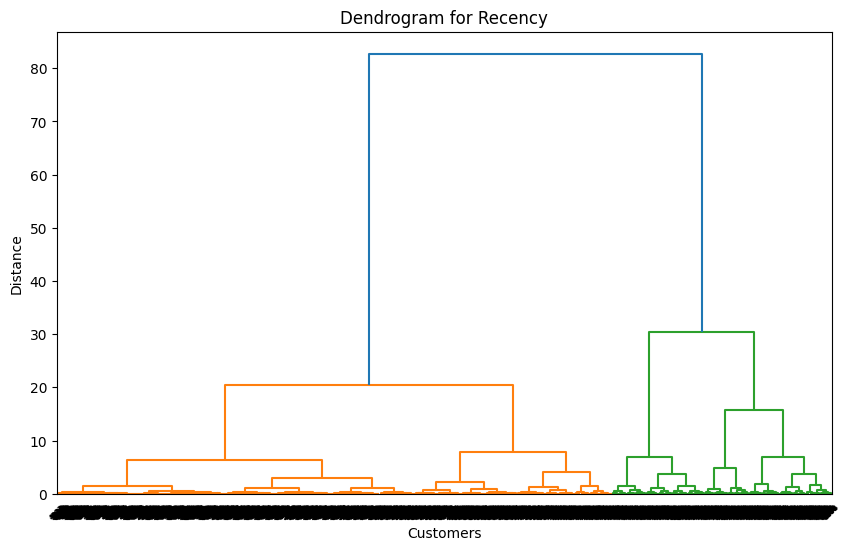

In [29]:
import scipy.cluster.hierarchy as sch        # Hierarchical Clustering on Recency (Dendrogram (to choose number of clusters))

plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(rfm_recency_scaled, method = 'ward'))
plt.title('Dendrogram for Recency')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering        # Apply Agglomerative Clustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean',linkage = 'ward')

hc

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [20]:
customer_last_purchase['HC_Cluster'] = hc.fit_predict(rfm_recency_scaled)
customer_last_purchase['HC_Cluster']


0       1
1       0
2       0
3       0
4       1
       ..
4367    1
4368    2
4369    0
4370    0
4371    0
Name: HC_Cluster, Length: 4372, dtype: int64

#### Use Elbow Method , Silhouette Score to decide the number of clusters

In [21]:
from sklearn.metrics import silhouette_score                       #  Silhouette Score (Hierarchical)

sil_score_hc = silhouette_score(rfm_recency_scaled, customer_last_purchase['HC_Cluster'])
sil_score_hc

0.6512658003972798

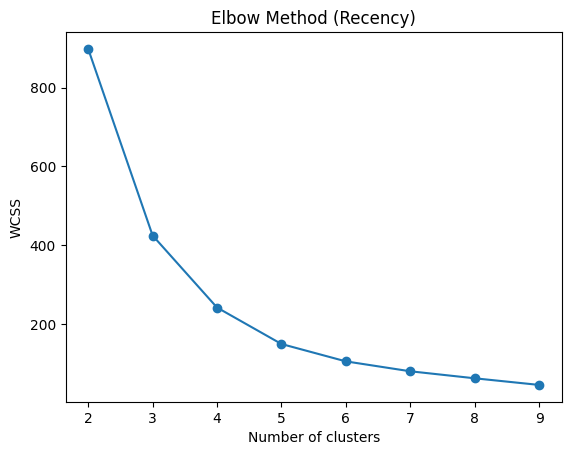

In [23]:
from sklearn.cluster import KMeans                     # Elbow Method for Recency

wcss = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(rfm_recency_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method (Recency)')
plt.show()

In [24]:
from sklearn.cluster import DBSCAN                    # Apply DBSCAN

dbscan = DBSCAN(eps = 0.5, min_samples = 5)
customer_last_purchase['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_recency_scaled)
customer_last_purchase['DBSCAN_Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: DBSCAN_Cluster, Length: 4372, dtype: int64

In [25]:
customer_last_purchase.groupby('HC_Cluster')['Recency'].mean().sort_values()   # Cluster Interpretation


HC_Cluster
0     34.933248
2    161.253308
1    285.644663
Name: Recency, dtype: float64

#### Calculate Frequency = Number of transactions per customer

In [9]:
frequency = (data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index())     # Calculate Frequency
frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [10]:
frequency.columns = ['CustomerID', 'Frequency']
frequency.columns

Index(['CustomerID', 'Frequency'], dtype='object')

#### Choose Clustering Algorithm K-means

In [17]:
scaler = StandardScaler()                                      # Prepare Frequency for Clustering
frequency_scaled = scaler.fit_transform(frequency[['Frequency']])
frequency_scaled

array([[-0.32936215],
       [ 0.20610242],
       [-0.11517632],
       ...,
       [-0.22226923],
       [ 1.16993863],
       [-0.22226923]], shape=(4372, 1))

In [30]:
kmeans = KMeans(n_clusters=3, random_state=42)                          # Apply Clustering
frequency['FrequencyCluster'] = kmeans.fit_predict(frequency_scaled)
frequency['FrequencyCluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    2
4371    0
Name: FrequencyCluster, Length: 4372, dtype: int32

In [31]:
frequency.groupby('FrequencyCluster')['Frequency'].mean().sort_values()   # Understand the Clusters

FrequencyCluster
0      3.209560
2     20.631169
1    124.083333
Name: Frequency, dtype: float64

#### Choose Clustering Algorithm (Hierarchial, DBScan)

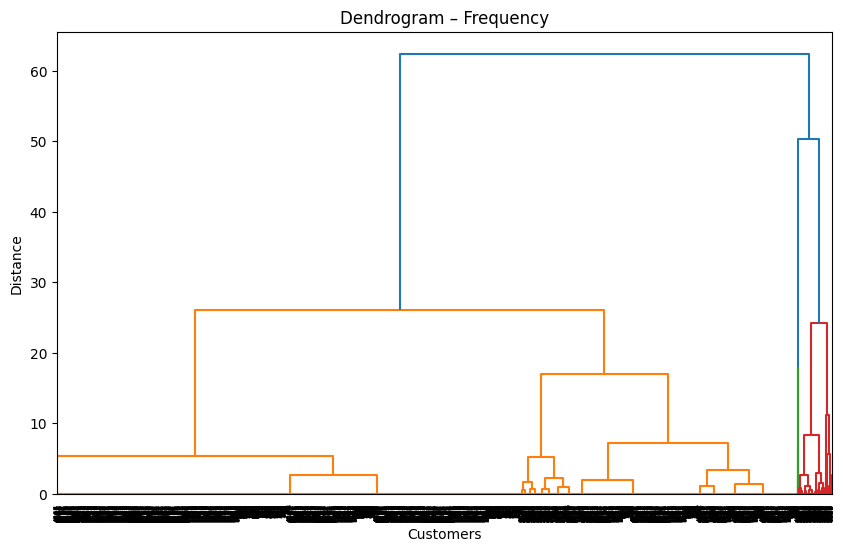

In [32]:
plt.figure(figsize=(10, 6))                                # Hierarchical Clustering on Frequency Dendrogram (Primary method for cluster count)
sch.dendrogram(sch.linkage(frequency_scaled, method = 'ward'))
plt.title('Dendrogram – Frequency')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [36]:
hc = AgglomerativeClustering(n_clusters=3, metric = 'euclidean',linkage = 'ward')    # Apply Agglomerative Clustering
hc

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [37]:
frequency['HC_Cluster'] = hc.fit_predict(frequency_scaled)
frequency['HC_Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: HC_Cluster, Length: 4372, dtype: int64

#### Use Elbow Method , Silhouette Score to decide the number of clusters

In [34]:
sil_hc = silhouette_score(frequency_scaled, frequency['HC_Cluster'])    # Silhouette Score (Hierarchical)
sil_hc

0.836218925975593

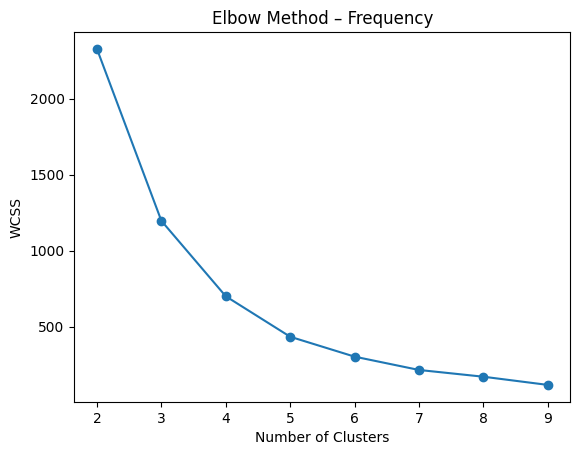

In [36]:
wcss = []                                        # Elbow Method using Frequency

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42) 
    kmeans.fit(frequency_scaled) 
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method – Frequency')
plt.show()

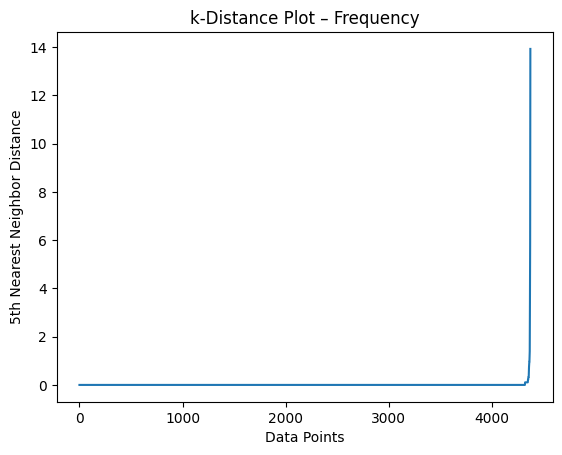

In [35]:
from sklearn.neighbors import NearestNeighbors                        #  Choose eps using k-Distance Plot
import numpy as np

neighbors = NearestNeighbors(n_neighbors = 5)
neighbors_fit = neighbors.fit(frequency_scaled)
distances, indices = neighbors_fit.kneighbors(frequency_scaled)

distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Plot – Frequency')
plt.show()

In [37]:
dbscan = DBSCAN(eps = 0.5, min_samples=5)                           #  Apply DBSCAN
frequency['DBSCAN_Cluster'] = dbscan.fit_predict(frequency_scaled)
frequency['DBSCAN_Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: DBSCAN_Cluster, Length: 4372, dtype: int64

In [38]:
frequency.groupby('HC_Cluster')['Frequency'].mean().sort_values()

HC_Cluster
0      3.733126
1     29.723404
2    167.500000
Name: Frequency, dtype: float64

#### Calculate Monetary = Total amount spent by customer

In [18]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']   # Create Transaction Amount Column
data['TotalAmount']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: TotalAmount, Length: 541909, dtype: float64

In [19]:
monetary = (data.groupby('CustomerID')['TotalAmount'].sum().reset_index())   # Calculate Monetary Value
monetary

,CustomerID,TotalAmount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [20]:
monetary.columns = ['CustomerID', 'Monetary']    
monetary.columns

Index(['CustomerID', 'Monetary'], dtype='object')

#### Choose Clustering Algorithm K-means

In [21]:
scaler = StandardScaler()                                       # Prepare Monetary for Clustering
monetary_scaled = scaler.fit_transform(monetary[['Monetary']])
monetary_scaled

array([[-0.23100099],
       [ 0.29343167],
       [-0.01231622],
       ...,
       [-0.20951263],
       [ 0.02390005],
       [-0.00744423]], shape=(4372, 1))

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)                    # Apply Clustering (K-Means)
monetary['MonetaryCluster'] = kmeans.fit_predict(monetary_scaled)
monetary['MonetaryCluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: MonetaryCluster, Length: 4372, dtype: int32

In [27]:
monetary.groupby('MonetaryCluster')['Monetary'].mean().sort_values()   # Cluster Interpretation

MonetaryCluster
0      1372.577826
2     40543.517742
1    182181.981667
Name: Monetary, dtype: float64

#### Choose Clustering Algorithm (Hierarchial, DBScan)

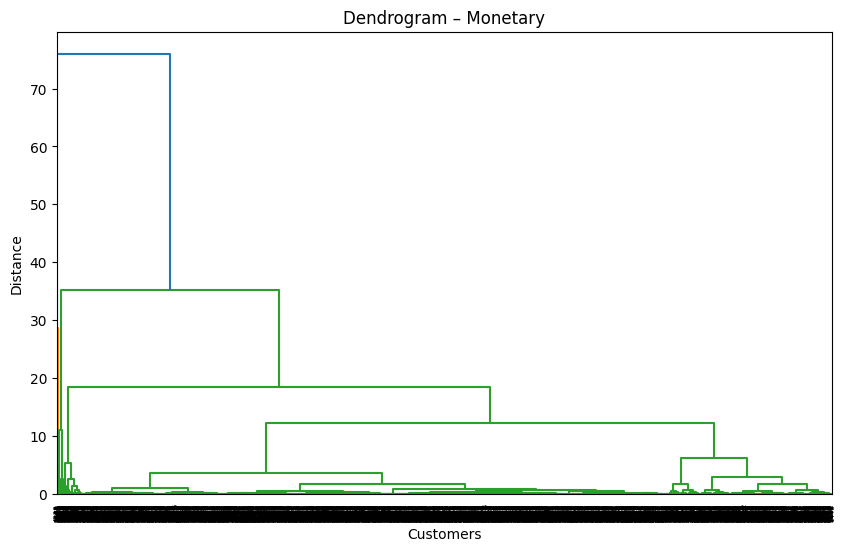

In [44]:
plt.figure(figsize=(10, 6))                                   # Hierarchical Clustering Dendrogram (Primary cluster-count tool)
sch.dendrogram(sch.linkage(monetary_scaled, method = 'ward'))
plt.title('Dendrogram – Monetary')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

In [32]:
hc = AgglomerativeClustering(n_clusters = 3,metric = 'euclidean',linkage = 'ward')     # Apply Agglomerative Clustering
hc

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [33]:
monetary['HC_Cluster'] = hc.fit_predict(monetary_scaled)
monetary['HC_Cluster']

0       1
1       1
2       1
3       1
4       1
       ..
4367    1
4368    1
4369    1
4370    1
4371    1
Name: HC_Cluster, Length: 4372, dtype: int64

#### Use Elbow Method , Silhouette Score to decide the number of clusters

In [46]:
sil_hc = silhouette_score(monetary_scaled, monetary['HC_Cluster'])      # Silhouette Score (Hierarchical)
sil_hc

0.95025102433227

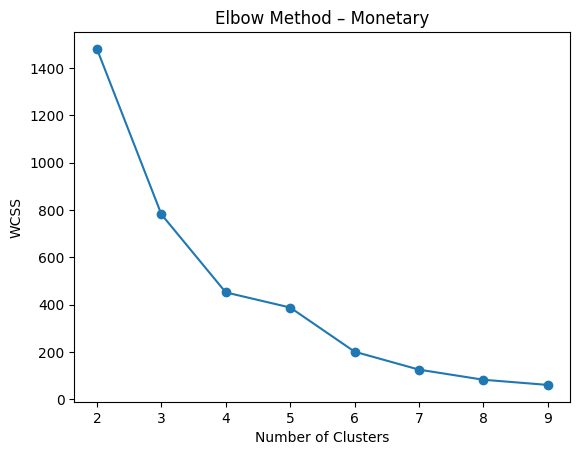

In [47]:
wcss = []                                              # Elbow Method

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(monetary_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method – Monetary')
plt.show()

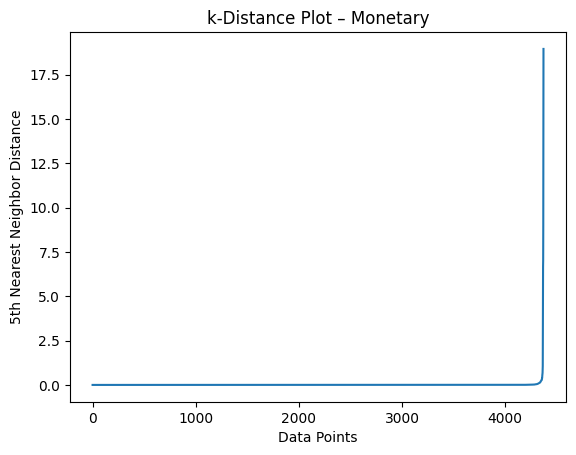

In [49]:
from sklearn.neighbors import NearestNeighbors                     #  Choose eps using k-Distance Plot
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(monetary_scaled)
distances, indices = neighbors_fit.kneighbors(monetary_scaled)

distances = np.sort(distances[:, 4])

plt.plot(distances)
plt.xlabel('Data Points')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('k-Distance Plot – Monetary')
plt.show()

In [48]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)                    # Apply DBSCAN
monetary['DBSCAN_Cluster'] = dbscan.fit_predict(monetary_scaled)
monetary['DBSCAN_Cluster']

0       0
1       0
2       0
3       0
4       0
       ..
4367    0
4368    0
4369    0
4370    0
4371    0
Name: DBSCAN_Cluster, Length: 4372, dtype: int64

In [34]:
monetary.groupby('HC_Cluster')['Monetary'].mean().sort_values()    # Cluster Interpretation

HC_Cluster
1      1386.300388
2     40928.794815
0    168745.324286
Name: Monetary, dtype: float64

#### Customer–Product Interaction Matrix For collaborative filtering

In [8]:
user_item_matrix = (data.pivot_table(index = 'CustomerID', columns = 'StockCode', values = 'Quantity', aggfunc ='sum').fillna(0))
user_item_matrix

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12347.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
12349.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Collaborative Filtering Model

In [9]:
from sklearn.metrics.pairwise import cosine_similarity       # Compute Item Similarity (Cosine Similarity)

item_similarity = cosine_similarity(user_item_matrix.T)

item_similarity_data = pd.DataFrame(item_similarity, index = user_item_matrix.columns, columns = user_item_matrix.columns)
item_similarity_data

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.001548,0.000990,0.0,0.000000,0.853890,0.052106,0.021922,0.004643,...,0.000000,0.0,0.000000,0.038750,0.000000,-0.000051,0.000000,0.000258,0.0,0.070843
10080,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.004958,0.020655,0.011878,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,0.0,0.000000
10120,0.001548,0.000000,1.000000,0.004903,0.0,0.000000,0.001600,0.042560,0.010420,0.014993,...,0.000000,0.0,0.000000,0.000000,0.000000,-0.000021,0.000000,0.007154,0.0,0.000000
10123C,0.000990,0.000000,0.004903,1.000000,0.0,0.000000,0.004417,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
10124A,0.000000,0.000000,0.000000,0.000000,1.0,0.491784,0.001099,0.014973,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D,-0.000051,0.000000,-0.000021,0.000000,0.0,0.000000,-0.000217,-0.000074,-0.000879,-0.000066,...,0.000000,0.0,0.000000,-0.001276,0.000000,1.000000,0.000000,0.061591,0.0,-0.000268
DOT,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.153671,0.063144,...,0.000000,0.0,0.000000,0.000000,-1.000000,0.000000,1.000000,-0.000207,0.0,0.000000
M,0.000258,0.000006,0.007154,0.000000,0.0,0.000000,0.000055,0.002713,0.001672,-0.034300,...,0.000000,0.0,0.001343,-0.000032,0.000207,0.061591,-0.000207,1.000000,0.0,-0.023027


In [13]:
def recommend_products(customer_id, n_recommendations = 5):                   # Recommendation Function
    if customer_id not in user_item_matrix.index:
        return []

    customer_purchases = user_item_matrix.loc[customer_id]
    purchased_items = customer_purchases[customer_purchases > 0].index

    scores = item_similarity_data[purchased_items].sum(axis = 1)
    scores = scores.drop(purchased_items)

    return scores.sort_values(ascending=False).head(n_recommendations).index.tolist()


In [23]:
recommend_products(customer_id=17850, n_recommendations=5)

['23284', '22767', '21428', '22365', '22960']

In [15]:
from sklearn.model_selection import train_test_split               # Train–Test Split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
def precision_at_k(k = 5):                                          # Precision@K Evaluation
    hit = 0
    total = 0
    for customer in test_data['CustomerID'].unique():
        actual_items = test_data[test_data['CustomerID'] == customer]['StockCode'].unique()
        recommended_items = recommend_products(customer, k)
        hit += len(set(actual_items) & set(recommended_items))
        total += k
    return hit / total
    

In [22]:
precision_at_k(5)


0.00033980582524271844

#### Customer Segmentation Interpretation

In [24]:
rfm_recommendation_strategy = {'Champions': 'Premium Cross-Sell', 
                               'Loyal': 'Personalized Bundles', 
                               'At-Risk': 'Discounted Favorites', 
                               'Dormant': 'Trending Products'
                              }

#### Streamlit App Code (app.py)

In [30]:
!pip install streamlit


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
!streamlit --version


Streamlit, version 1.53.0


In [31]:
import streamlit as st
import pandas as pd

st.set_page_config(page_title = "Online Retail Recommendation System")

st.title("🛒 Product Recommendation System")

customer_id = st.number_input("Enter Customer ID", step = 1)

if st.button("Get Recommendations"):
    recs = recommend_products(customer_id)

    if recs:
        st.success("Recommended Products:")
        for product in recs:
            st.write(product)
    else:
        st.warning("Customer not found or no recommendations available.")

2026-01-19 13:52:43.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-19 13:52:43.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar